In [4]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rerkki/smartindustry/refs/heads/main/datasets/bmw.csv", encoding='latin-1')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [10]:
print('Descriptive statistics for Mileage by Fuel Type:')
display(df.groupby('fuelType')['mileage'].describe())

print('\nDescriptive statistics for Engine Size by Fuel Type:')
display(df.groupby('fuelType')['engineSize'].describe())

print('\nDescriptive statistics for MPG by Fuel Type:')
display(df.groupby('fuelType')['mpg'].describe())

Descriptive statistics for Mileage by Fuel Type:


,count,mean,std,min,25%,50%,75%,max
fuelType,,,,,,,,
Diesel,7027.0,29852.804042,26386.895351,1.0,7273.50,24600.0,44989.00,214000.0
Electric,3.0,19925.333333,9743.527099,9990.0,15155.50,20321.0,24893.00,29465.0
Hybrid,298.0,23400.530201,24642.860166,5.0,4964.75,16900.0,34000.75,178987.0
Other,36.0,44760.638889,15151.026600,19178.0,32291.75,44351.5,54037.75,78878.0
Petrol,3417.0,16524.097454,19591.399460,3.0,3412.00,9097.0,23910.00,141000.0



Descriptive statistics for Engine Size by Fuel Type:


,count,mean,std,min,25%,50%,75%,max
fuelType,,,,,,,,
Diesel,7027.0,2.197794,0.466403,0.0,2.0,2.0,2.0,3.0
Electric,3.0,0.333333,0.577350,0.0,0.0,0.0,0.5,1.0
Hybrid,298.0,1.718121,0.659870,0.0,1.5,2.0,2.0,3.0
Other,36.0,1.672222,0.556833,0.6,1.5,2.0,2.0,2.0
Petrol,3417.0,2.152063,0.669197,0.0,1.5,2.0,3.0,6.6



Descriptive statistics for MPG by Fuel Type:


,count,mean,std,min,25%,50%,75%,max
fuelType,,,,,,,,
Diesel,7027.0,57.790835,9.612489,26.7,51.4,58.9,65.7,83.1
Electric,3.0,470.800000,0.000000,470.8,470.8,470.8,470.8,470.8
Hybrid,298.0,156.876846,118.790838,5.5,113.0,134.5,156.9,470.8
Other,36.0,199.363889,136.197342,85.6,134.5,134.5,148.7,470.8
Petrol,3417.0,42.904009,7.672533,19.1,37.7,42.8,48.7,68.9


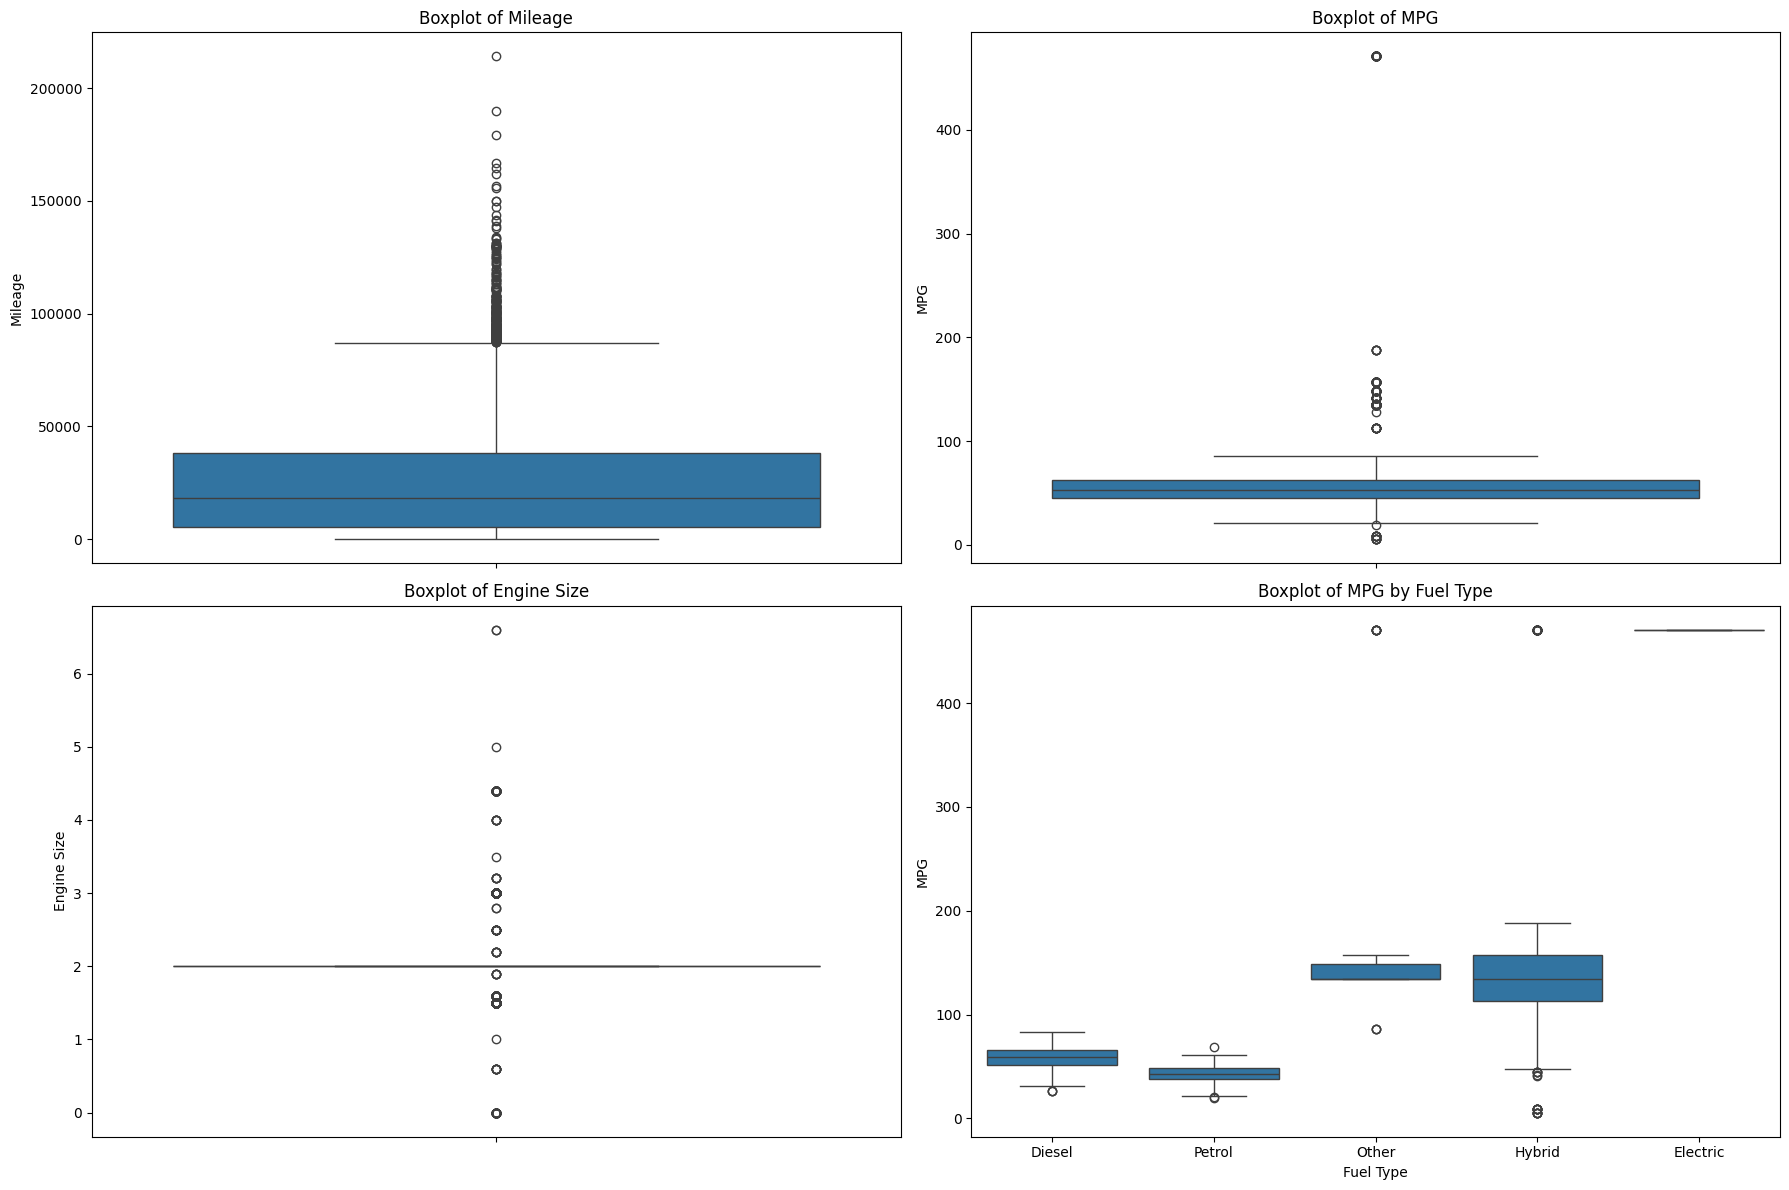

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Boxplot of Mileage
sns.boxplot(y=df['mileage'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Mileage')
axes[0, 0].set_ylabel('Mileage')

# Boxplot of MPG
sns.boxplot(y=df['mpg'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of MPG')
axes[0, 1].set_ylabel('MPG')

# Boxplot of Engine Size
sns.boxplot(y=df['engineSize'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Engine Size')
axes[1, 0].set_ylabel('Engine Size')

# Boxplot of MPG by Fuel Type
sns.boxplot(x=df['fuelType'], y=df['mpg'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of MPG by Fuel Type')
axes[1, 1].set_xlabel('Fuel Type')
axes[1, 1].set_ylabel('MPG')

plt.tight_layout()
plt.show()

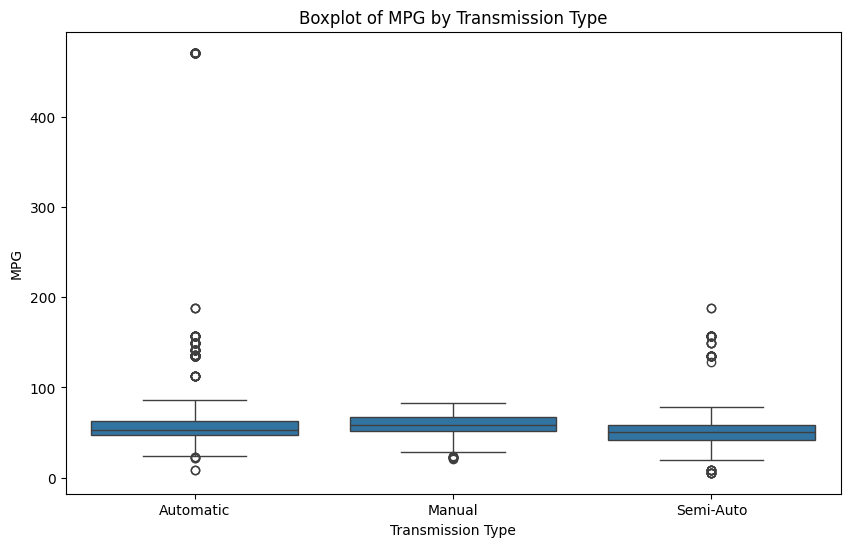

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['transmission'], y=df['mpg'])
plt.title('Boxplot of MPG by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('MPG')
plt.show()

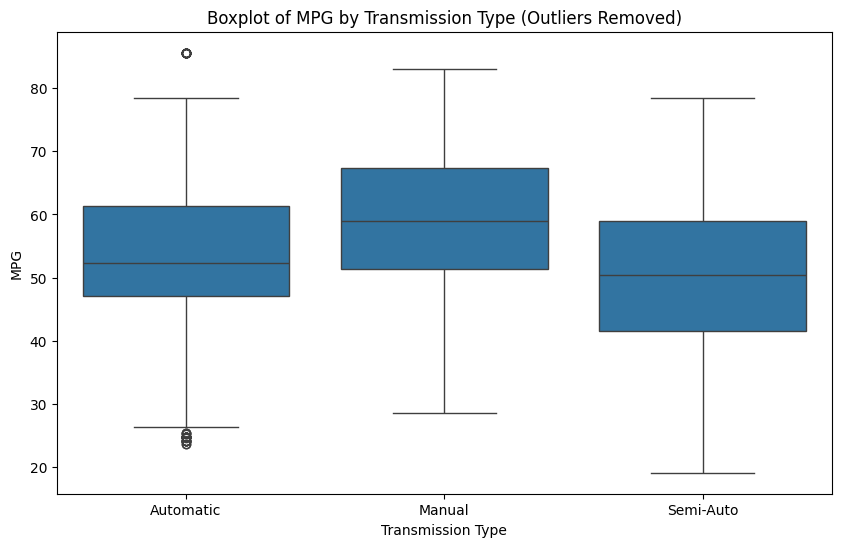

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers_iqr(df, column, group_by_col):
    # Create a copy to avoid SettingWithCopyWarning
    df_filtered = df.copy()

    for group_name, group_df in df.groupby(group_by_col):
        Q1 = group_df[column].quantile(0.25)
        Q3 = group_df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers for the current group
        df_filtered = df_filtered[~((df_filtered[group_by_col] == group_name) &
                                     ((df_filtered[column] < lower_bound) | (df_filtered[column] > upper_bound)))]
    return df_filtered

# Remove outliers from 'mpg' grouped by 'transmission'
df_no_outliers = remove_outliers_iqr(df, 'mpg', 'transmission')

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['transmission'], y=df_no_outliers['mpg'])
plt.title('Boxplot of MPG by Transmission Type (Outliers Removed)')
plt.xlabel('Transmission Type')
plt.ylabel('MPG')
plt.show()

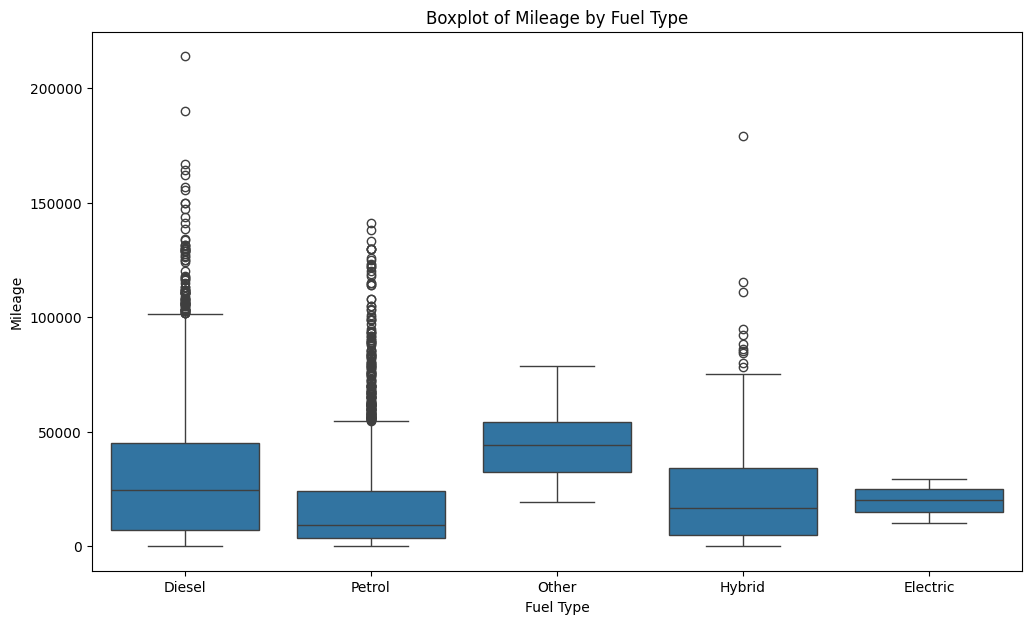

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(x=df['fuelType'], y=df['mileage'])
plt.title('Boxplot of Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.show()